**Installing Important libraries and loading the dataset**

In [53]:
import pandas as pd
import numpy as np
df_medical = pd.read_csv('/content/Medical_final (1).csv')
df_school = pd.read_csv('/content/School_final.csv')
df_food = pd.read_csv('/content/Food_final.csv')
df_price = pd.read_csv('/content/Real_estate.csv')


**EDA**

In [54]:
df_school.head()

,Neighbourhood,Latitude,Longitude,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating
0,Agol,23.02776,72.60027,58,4.262857,12,3.888889,49,4.290476,11,4.433333,3,4.766667
1,Ahmedabad Cantonment,23.02776,72.60027,58,4.262857,12,3.888889,49,4.290476,11,4.433333,3,4.766667
2,Alam Roza,23.00212,72.54979,60,4.428571,21,4.473333,7,3.433333,3,NaN,7,4.366667
3,Ambawadi,23.01885,72.55441,58,4.440541,57,4.294737,9,3.550000,8,4.850000,4,3.866667
4,Amraiwadi,23.00735,72.62268,60,3.837143,11,4.250000,10,4.450000,3,3.900000,4,3.975000


In [55]:
df_medical.head()

,Neighbourhood,Latitude,Longitude,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating
0,Agol,23.02776,72.60027,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000
1,Ahmedabad Cantonment,23.02776,72.60027,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000
2,Alam Roza,23.00212,72.54979,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000
3,Ambawadi,23.01885,72.55441,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857
4,Amraiwadi,23.00735,72.62268,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000


In [56]:
df_price.head()

,Unnamed: 0,Unnamed: 0.1,Neighborhood,Latitude,Longitude,Avg land price per sq feet
0,0,0,Agol,23.02776,72.60027,555
1,1,1,Ahmedabad Cantonment,23.02776,72.60027,6257
2,2,2,Alam Roza,23.00212,72.54979,"3,500"
3,3,3,Ambawadi,23.01885,72.55441,6594
4,4,4,Amraiwadi,23.00735,72.62268,5097


**Preprocessing removing NA value and getting Info about Data**

In [57]:
df_school = df_school.fillna(0)
df_medical = df_medical.fillna(0)
df_food = df_food.fillna(0)
df_price = df_price.fillna(0)
#df_school.head()
#df_food.shape
df_food.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 73 non-null     object 
 1   Latitude                      73 non-null     float64
 2   Longitude                     73 non-null     float64
 3   Bakery_Count                  73 non-null     int64  
 4   Mean_bakery_rating            73 non-null     float64
 5   Cafe_Count                    73 non-null     int64  
 6   Mean_cafe_rating              73 non-null     float64
 7   ConvenienceStore_Count        73 non-null     int64  
 8   Mean_conveniencestore_rating  73 non-null     float64
 9   Food_Count                    73 non-null     int64  
 10  Mean_Food_rating              73 non-null     float64
 11  Supermarket_Count             73 non-null     int64  
 12  Mean_supermarket_rating       73 non-null     float64
 13  MealDel

# Remove the latitude and longitude column of the dataset and then merge food, school and resturant data

In [58]:
#Prepare school dataset 
a_school = df_school.columns
df2_school = df_school[a_school[3:]]
df2_school.head()
#df2_school.describe() 

#Prepare food dataset 
a_food = df_food.columns
df2_food = df_food[a_food[3:]]

#Concat all three dataset 
df_final = pd.concat([df_medical , df2_school, df2_food], axis= 1)

# Add price column in the dataset 
df_final['price'] = df_price['Avg land price per sq feet']
df_final['price'] = df_final['price'].str.replace(',', '')
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')

#EDA final data
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 81 non-null     object 
 1   Latitude                      81 non-null     float64
 2   Longitude                     81 non-null     float64
 3   Hospital_Count                81 non-null     int64  
 4   Mean_hospital_rating          81 non-null     float64
 5   Doctor_Count                  81 non-null     int64  
 6   Mean_doctor_rating            81 non-null     float64
 7   Dentist_Count                 81 non-null     int64  
 8   Mean_dentist_rating           81 non-null     float64
 9   Pharmacy_Count                81 non-null     int64  
 10  Mean_pharmacy_rating          81 non-null     float64
 11  Physiotherapist_Count         81 non-null     int64  
 12  Mean_physiotherapist_rating   81 non-null     float64
 13  School_

(81, 38)

In [8]:
#setting max column and row option so that we can see all column here only
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#df_final.shape
#df_final.columns

#Extracting numerical column for normalization
df_final2 = df_final.iloc[0:73] # first five rows of 
df_final2.tail(20)
a = df_final2.columns
df_final2 = df_final2[a[3:]]
df_final2.head()
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Hospital_Count                73 non-null     int64  
 1   Mean_hospital_rating          73 non-null     float64
 2   Doctor_Count                  73 non-null     int64  
 3   Mean_doctor_rating            73 non-null     float64
 4   Dentist_Count                 73 non-null     int64  
 5   Mean_dentist_rating           73 non-null     float64
 6   Pharmacy_Count                73 non-null     int64  
 7   Mean_pharmacy_rating          73 non-null     float64
 8   Physiotherapist_Count         73 non-null     int64  
 9   Mean_physiotherapist_rating   73 non-null     float64
 10  School_Count                  73 non-null     float64
 11  Mean_school_rating            73 non-null     float64
 12  University_Count              73 non-null     float64
 13  Mean_un

Normalize the dataset 

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize 

# Scaling the data to bring all the attributes to a comparable level 
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_final2)
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
feature_normalized = normalize(features_normal) 

pd.DataFrame(features_normal).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.708219,0.760536,0.601826,0.799808,0.296804,0.797855,0.595205,0.782496,0.218200,0.541814,0.874658,0.878391,0.255936,0.792488,0.239726,0.703098,0.240935,0.556727,0.251468,0.699259,0.456732,0.758995,0.487215,0.832687,0.223744,0.192877,0.973973,0.893084,0.256059,0.782027,0.136986,0.549234,0.936888,0.494257,0.483288
std,0.362594,0.291098,0.379027,0.297572,0.286026,0.326072,0.349796,0.243002,0.258881,0.472281,0.241253,0.112812,0.233472,0.217458,0.285093,0.300252,0.246109,0.435240,0.222753,0.355591,0.288310,0.253989,0.287020,0.186366,0.283577,0.357695,0.128049,0.112296,0.246209,0.245851,0.185453,0.420222,0.179735,0.142015,0.164011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.516667,0.822162,0.233333,0.862500,0.083333,0.869524,0.333333,0.805625,0.000000,0.000000,0.916667,0.855172,0.116667,0.777778,0.050000,0.710000,0.000000,0.000000,0.071429,0.660000,0.268293,0.804167,0.283333,0.846753,0.000000,0.000000,1.000000,0.879908,0.115385,0.800000,0.000000,0.000000,0.964286,0.378160,0.400113
50%,1.000000,0.858750,0.716667,0.901905,0.200000,0.930909,0.650000,0.851429,0.142857,0.832000,0.966667,0.893604,0.183333,0.847879,0.133333,0.805714,0.117647,0.830000,0.214286,0.866667,0.439024,0.841667,0.416667,0.878664,0.000000,0.000000,1.000000,0.900718,0.153846,0.870000,0.076923,0.780000,1.000000,0.499182,0.455689
75%,1.000000,0.895000,1.000000,0.937273,0.416667,0.962500,1.000000,0.884167,0.357143,0.970000,1.000000,0.917182,0.333333,0.886000,0.233333,0.860000,0.411765,0.913333,0.285714,0.953333,0.756098,0.863333,0.716667,0.901299,0.333333,0.000000,1.000000,0.928114,0.307692,0.892500,0.153846,0.860000,1.000000,0.582326,0.566936
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
features_normal
# Converting the numpy array into a pandas DataFrame 
df_normalized = pd.DataFrame(data = feature_normalized,  columns = df_final2.columns[:35]) 
df_normalized.head(15)
#df_final2.columns

,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price
0,0.128205,0.208624,0.174824,0.219696,0.046620,0.224358,0.151515,0.206099,0.000000,0.000000,0.225329,0.210858,0.046620,0.181299,0.190364,0.200021,0.150829,0.206681,0.049950,0.222221,0.176246,0.187645,0.167054,0.198588,0.077700,0.000000,0.233099,0.205106,0.170342,0.204239,0.017931,0.233099,0.224774,0.086191,0.000000
1,0.127218,0.207019,0.173479,0.218006,0.046261,0.222632,0.150349,0.204513,0.000000,0.000000,0.223595,0.209236,0.046261,0.179904,0.188900,0.198482,0.149668,0.205091,0.049565,0.220511,0.174890,0.186201,0.165769,0.197060,0.077102,0.000000,0.231306,0.203528,0.169031,0.202668,0.017793,0.231306,0.223045,0.085528,0.123818
2,0.230306,0.206778,0.230306,0.192050,0.122830,0.227674,0.230306,0.200441,0.164505,0.219252,0.230306,0.216430,0.080607,0.206048,0.026869,0.158144,0.040642,0.000000,0.115153,0.201134,0.134814,0.195760,0.057577,0.207376,0.000000,0.000000,0.230306,0.200404,0.022145,0.185781,0.035432,0.188851,0.230306,0.155014,0.063674
3,0.214709,0.196612,0.214709,0.187645,0.200395,0.192961,0.214709,0.189189,0.153363,0.195078,0.207552,0.202318,0.203973,0.184423,0.032206,0.152443,0.101039,0.208267,0.061345,0.166041,0.109973,0.187870,0.189659,0.188763,0.071570,0.000000,0.214709,0.185278,0.024774,0.194311,0.082580,0.150296,0.214709,0.104956,0.121726
4,0.196608,0.208042,0.112945,0.231296,0.066930,0.233699,0.167326,0.199194,0.053783,0.248479,0.250989,0.204368,0.046015,0.213341,0.041832,0.223380,0.044292,0.195772,0.071711,0.199537,0.085704,0.218082,0.104579,0.216438,0.083663,0.000000,0.250989,0.222065,0.072401,0.219365,0.000000,0.000000,0.250989,0.106342,0.107022
5,0.203157,0.185611,0.203157,0.184820,0.203157,0.194238,0.203157,0.172825,0.116090,0.200719,0.192999,0.182089,0.081263,0.178101,0.047403,0.170144,0.047802,0.186904,0.072556,0.190967,0.198202,0.176456,0.203157,0.176851,0.203157,0.166588,0.203157,0.181276,0.078137,0.174038,0.125019,0.165428,0.203157,0.101370,0.094846
6,0.247349,0.214723,0.181389,0.230859,0.037102,0.211483,0.226737,0.213250,0.035336,0.247349,0.230859,0.201981,0.065960,0.215003,0.045347,0.179740,0.029100,0.230035,0.053003,0.160777,0.066362,0.208392,0.065960,0.222293,0.000000,0.000000,0.239104,0.223672,0.028540,0.222614,0.038054,0.000000,0.247349,0.090445,0.098317
7,0.255335,0.219304,0.153201,0.245486,0.021278,0.224694,0.157456,0.215900,0.018238,0.000000,0.246823,0.211763,0.046811,0.215758,0.046811,0.191866,0.030039,0.255335,0.054715,0.178734,0.074732,0.213970,0.076600,0.238754,0.000000,0.000000,0.255335,0.247538,0.049103,0.217399,0.019641,0.000000,0.255335,0.127458,0.116353
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004320,0.259175,0.000000,0.000000,0.250536,0.234446,0.051835,0.201581,0.211660,0.222397,0.167702,0.229802,0.055538,0.247080,0.195962,0.208636,0.185742,0.220804,0.086392,0.000000,0.259175,0.228050,0.189397,0.227087,0.019937,0.259175,0.249919,0.095833,0.118103
9,0.141509,0.230273,0.192966,0.242494,0.051458,0.247640,0.167237,0.227486,0.000000,0.000000,0.257288,0.240090,0.072898,0.226414,0.025729,0.199827,0.030269,0.000000,0.036755,0.223841,0.100405,0.218893,0.158661,0.232116,0.000000,0.000000,0.257288,0.234078,0.084113,0.232074,0.000000,0.000000,0.257288,0.121413,0.118016


Plotting coorelation matrix using spearman corelation 

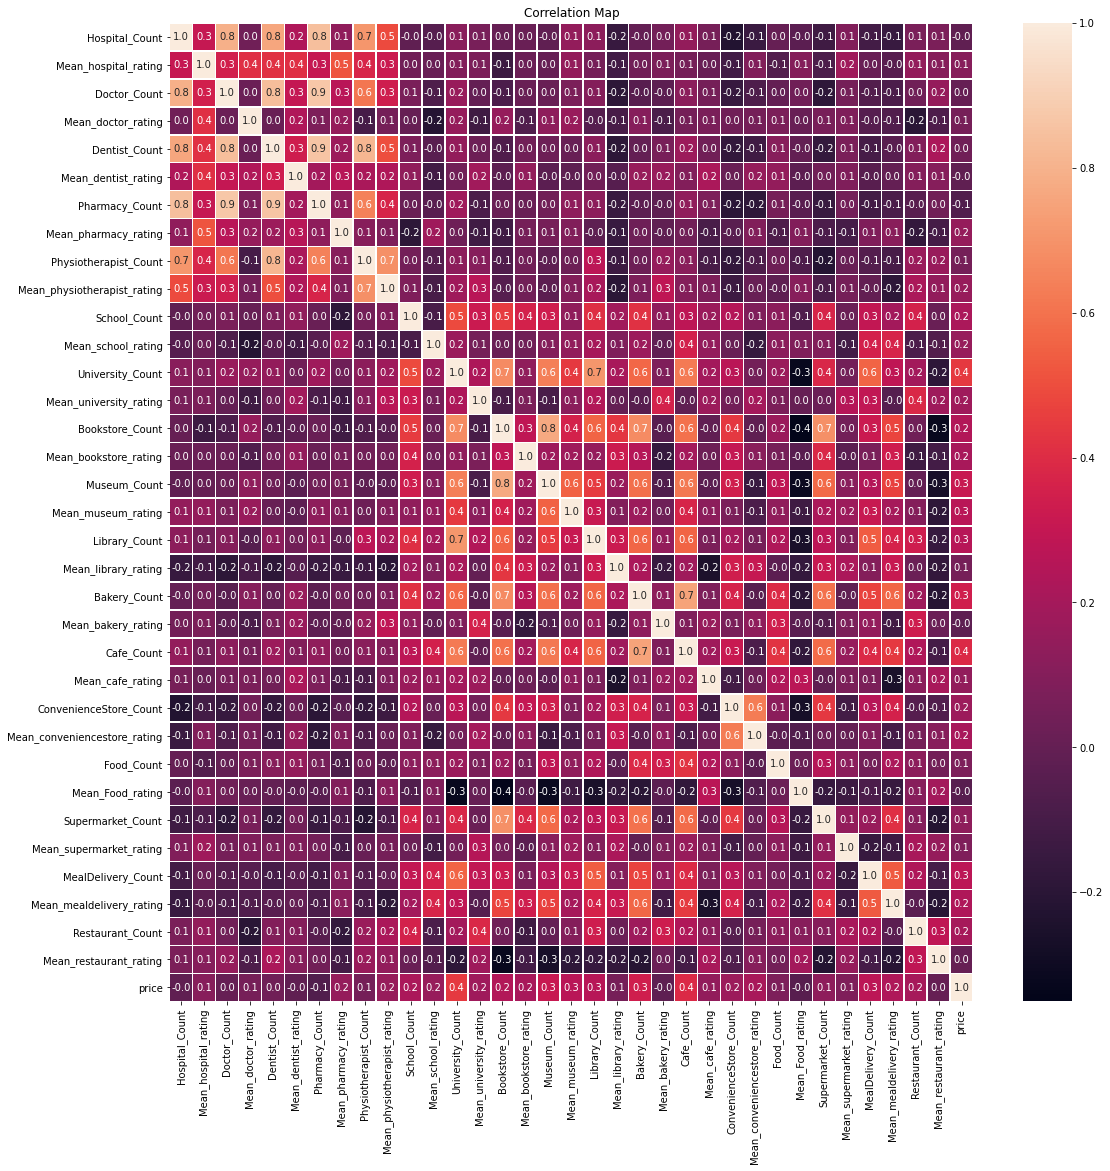

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_final2.corr(method = 'spearman'),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [16]:
#df is dataframe consisting correlation maatrix 
df = df_final2.corr(method = 'spearman')

In [17]:
df.head()

,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price
Hospital_Count,1.000000,0.304774,0.791337,0.036616,0.760074,0.229999,0.841820,0.134635,0.707642,0.491145,-0.014805,-0.046506,0.117566,0.062816,0.007933,0.015013,-0.014274,0.147900,0.126994,-0.155068,-0.001393,0.045830,0.148851,0.060367,-0.227306,-0.142120,0.006794,-0.030960,-0.124516,0.091698,-0.110616,-0.145639,0.067373,0.073877,-0.017066
Mean_hospital_rating,0.304774,1.000000,0.349451,0.412618,0.418564,0.410904,0.308280,0.519216,0.374401,0.324509,0.042718,0.017684,0.095691,0.073807,-0.132062,0.022074,0.006773,0.145570,0.054145,-0.114345,0.042297,0.074349,0.053754,0.009600,-0.111901,0.088372,-0.057703,0.098975,-0.076993,0.185773,0.015643,-0.044098,0.146270,0.107008,0.113259
Doctor_Count,0.791337,0.349451,1.000000,0.021470,0.841340,0.298694,0.868562,0.265472,0.611141,0.337475,0.066385,-0.074805,0.161200,0.000960,-0.076647,0.013424,0.015683,0.074096,0.100039,-0.188201,-0.040988,-0.025404,0.123266,0.054041,-0.155138,-0.074809,0.001080,0.039554,-0.183263,0.050792,-0.056346,-0.079633,0.037419,0.150450,0.003273
Mean_doctor_rating,0.036616,0.412618,0.021470,1.000000,0.015516,0.236498,0.076802,0.155390,-0.100831,0.052253,0.005372,-0.216843,0.154873,-0.126708,0.151912,-0.063635,0.133129,0.162333,-0.048072,-0.093514,0.104687,-0.086105,0.052757,0.066910,0.035623,0.053747,0.075769,0.012401,0.060990,0.083148,-0.045461,-0.064633,-0.199220,-0.072287,0.059867
Dentist_Count,0.760074,0.418564,0.841340,0.015516,1.000000,0.335986,0.861801,0.175919,0.811800,0.499889,0.079110,-0.038479,0.147043,0.024382,-0.069961,0.042998,0.026761,0.013024,0.119195,-0.187640,0.001736,0.063249,0.172466,0.044890,-0.167464,-0.123418,0.111440,-0.003606,-0.163058,0.068007,-0.102568,-0.038306,0.093417,0.222401,0.038923


**Clustering**

In [7]:
#importing important library 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

# **PCA**

Choosing optimal number of components which capture the greatest amount of variance in the data

In [39]:
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN 
pca = PCA(n_components = 20) 
X_principal = pca.fit_transform(feature_normalized) 

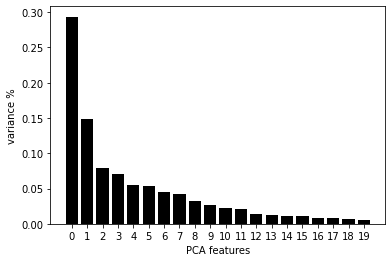

In [41]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(X_principal)

In the above figure we can see that 2 components explain majority of variance

In [29]:

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(feature_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.118853 -0.183566
1 -0.125199 -0.178121
2  0.164333 -0.019978
3  0.111096 -0.169959
4  0.069501 -0.019117


Visualizing first 2 feature component


Text(0, 0.5, 'PCA 2')

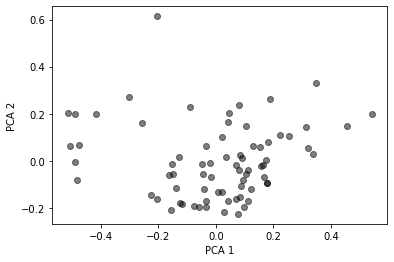

In [38]:
plt.scatter(X_principal['P1'], X_principal['P2'], alpha=.5, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Kmeans 

Inertia plot visualization from here we can see that K = 4 is an optimal choice

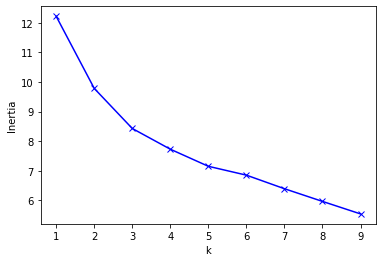

In [21]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(feature_normalized)
    kmeanModel.fit(feature_normalized)
    inertia.append(kmeanModel.inertia_)


plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

Visualizing K-means clustering with the help of PCA for different no of cluster for bettter Understanding

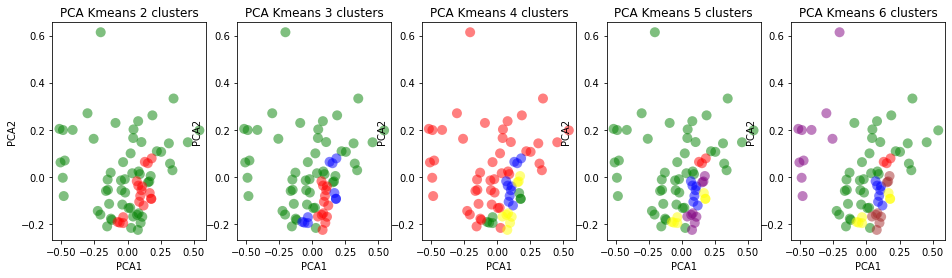

In [49]:
cluster_cases = [2,3,4,5,6]

def plot_clusters(cluster_name, cluster_cases, df_comp, dims=2):
    fig,ax = plt.subplots(1,len(cluster_cases), figsize=(16,4))

    for c,clusters in enumerate(cluster_cases):
        model = KMeans(n_clusters=clusters)
        df_comp2 = df_comp.copy()
#        m = model.fit(df_comp2.iloc[:,:dims])
        m = model.fit(df_comp2)
        df_comp2.insert(0, 'cluster', m.labels_)

        datas = []
        for i in range(clusters): 
            tup = []
            for j in range(dims):  ## should be cluster dims? pca dims?
                tup.append(df_comp2[df_comp2['cluster']==i][j])
            datas.append(tup)

        groups = [cluster_name+str(i) for i in range(clusters)]
        colors = ('green','red','blue','yellow','purple','brown')

        for data,color,group in zip(datas,colors,groups):
            x,y = data[0],data[1]
            ax[c].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
            ax[c].set_title(f'{cluster_name} Kmeans {clusters} clusters')
            ax[c].set(xlabel=cluster_name+'1')
            ax[c].set(ylabel=cluster_name+'2')
    plt.show()

# hmm which one to pick?
plot_clusters('PCA', cluster_cases, PCA_components)

From above figure we can say that K = 4 should be our choice for optimal result

Clustering for K = 4 if you want to change number of cluster change 'n_cluster parameters'

In [22]:
kmeans = KMeans(n_clusters=4).fit(features_normalized)

Adding k-means label back to the dataframe

In [25]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledCity = pd.concat((df_final2,labels),axis=1)
labeledCity = labeledCity.rename({0:'labels'},axis=1)

In [26]:
labeledCity.head()

,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price,labels
0,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,555.0,1
1,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,6257.0,1
2,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,60.0,4.428571,21.0,4.473333,7.0,3.433333,3.0,0.000000,7.0,4.366667,24.0,4.250000,15.0,4.333333,0.0,0.0,60.0,3.942222,5.0,4.033333,2.0,4.1,60.0,4.275000,3500.0,1
3,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,58.0,4.440541,57.0,4.294737,9.0,3.550000,8.0,4.850000,4.0,3.866667,21.0,4.375000,53.0,4.230952,1.0,0.0,60.0,3.909434,6.0,4.525000,5.0,3.5,60.0,4.091837,6594.0,1
4,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,60.0,3.837143,11.0,4.250000,10.0,4.450000,3.0,3.900000,4.0,3.975000,14.0,4.344444,25.0,4.150000,1.0,0.0,60.0,4.008333,15.0,4.370000,0.0,0.0,60.0,4.027083,5097.0,1


In [27]:
#labeledCity.to_csv('out.csv', index=False)  
labeledCity['Neighbourhood'] = df_school['Neighbourhood']
labeledCity['Latitude'] = df_school['Latitude']
labeledCity['Longitude'] = df_school['Longitude']
labeledCity.to_csv('out.csv', index=False) 

In [76]:
labeledCity.head()
labeledCity.to_csv('k4_label.csv', index=False)

**DBScan**

Visualizing DB-Scan clustering with the help of PCA for different epsilon and no of samples in the cluster for bettter Understanding

Plot DBscan labels in different colours according to no of samples in cluster and the value of epsilon

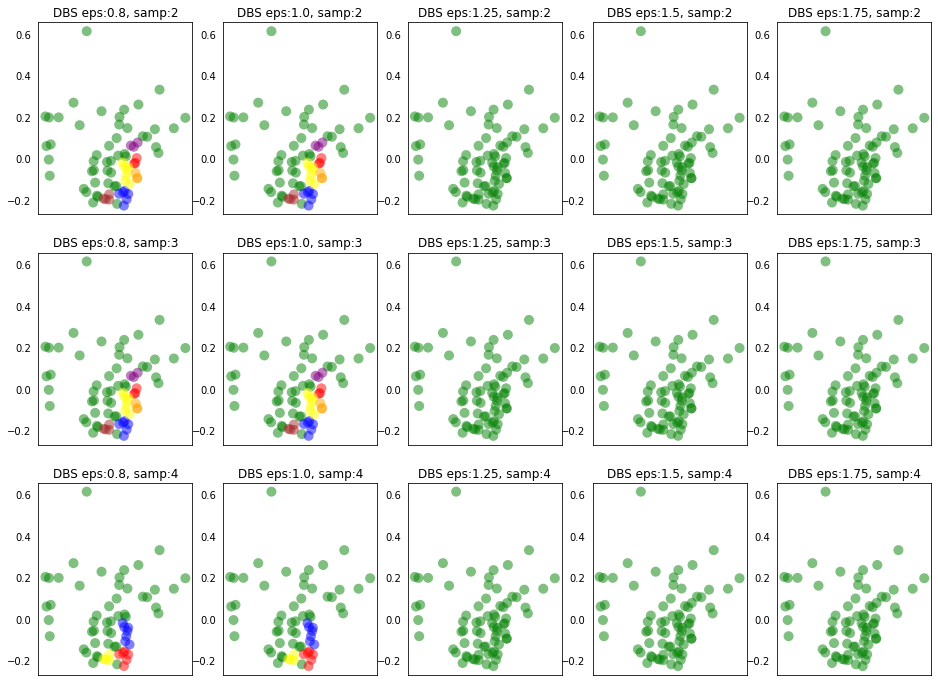

In [71]:
from sklearn.cluster import DBSCAN
import numpy as np
from itertools import product
import math

# try a variety of eps & samples 
samp_list = [2,3,4]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rl = len(samp_list)
def plot_clusters_dbscan(cluster_name, samp_list,eps_list,PCA_components , dims=2):
  fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(16,12))

  for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
      PCA_components3 = PCA_components.copy()

      ax[k%rl][math.floor(k/rl)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 
      clustering = DBSCAN(eps=eps, min_samples=samp).fit(PCA_components3)
      PCA_components3.insert(0, 'cluster', clustering.labels_)

      datas = []
      for i in range(len(set(clustering.labels_))): 
  #         tup = []
  #         for j in range(2):  # 2d hardcoded
  #             tup.append(PCA_components3[PCA_components3['cluster']==i][j])
          tup = [PCA_components3[PCA_components3['cluster']==i][j] for j in range(2)]
          datas.append(tup)

      colors = ('green','red','blue','yellow','purple','brown','orange','purple')
      groups = [str(i) for i in range(len(set(clustering.labels_)))]

      for data,color,group in zip(datas,colors,groups):
          x,y = data[0],data[1]
          ax[k%rl][math.floor(k/rl)].scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=100, label=group)
          ax[k%rl][math.floor(k/rl)].set_title(f'DBS eps:{eps}, samp:{samp}')

plot_clusters_dbscan(PCA, samp_list,eps_list,PCA_components , dims=2)

From above figure we can say that eps = 0.8 and 4 sample in cluster would be choice for optimal result

In [73]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.08, min_samples = 4).fit(PCA_components.iloc[:,:2]) 
labels = db_default.labels_ 
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1, -1,  0, -1, -1, -1,  0,
       -1,  2,  0,  0,  0,  0,  2, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
       -1,  0,  0,  0, -1,  0, -1,  0,  1, -1,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  2])

Adding DBscan labels back to dataset

In [74]:
labels = pd.DataFrame(db_default.labels_ ) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledCity = pd.concat((df_final2,labels),axis=1)
labeledCity = labeledCity.rename({0:'labels'},axis=1)

In [77]:
#labeledCity.to_csv('out.csv', index=False)  
labeledCity['Neighbourhood'] = df_school['Neighbourhood']
labeledCity['Latitude'] = df_school['Latitude']
labeledCity['Longitude'] = df_school['Longitude']
labeledCity.to_csv('dbscan_labels.csv', index=False) 

# Scoring 
## Scoring function
df_final2['Score'] = 0\
for column in df)_final2.columns:\
    df_final2['Score'] = +df_final.columns x df[column]['price']\
df_final2['Score'] += normalizedPrice

In [64]:

df_final2.insert(0, 'score', 0)
#df_final2['Score'] = 0
print('a')

for column in df_final2.columns[4:-2]:
    df_final2['score'] = +df_final2[column] * df[column]['price']
#df_final2['Score'] *= normalizedPrice
df_final2['score'] += df_normalized['price']
df_final2.head()

a


,score,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price
0,11.995562,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,555.0
1,12.119379,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,6257.0
2,12.472876,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,60.0,4.428571,21.0,4.473333,7.0,3.433333,3.0,0.000000,7.0,4.366667,24.0,4.250000,15.0,4.333333,0.0,0.0,60.0,3.942222,5.0,4.033333,2.0,4.1,60.0,4.275000,3500.0
3,12.530928,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,58.0,4.440541,57.0,4.294737,9.0,3.550000,8.0,4.850000,4.0,3.866667,21.0,4.375000,53.0,4.230952,1.0,0.0,60.0,3.909434,6.0,4.525000,5.0,3.5,60.0,4.091837,6594.0
4,12.516223,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,60.0,3.837143,11.0,4.250000,10.0,4.450000,3.0,3.900000,4.0,3.975000,14.0,4.344444,25.0,4.150000,1.0,0.0,60.0,4.008333,15.0,4.370000,0.0,0.0,60.0,4.027083,5097.0


In [65]:
df_final2.head(30)
#df_final2.shape

,score,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price
0,11.995562,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.00,60.0,3.986364,38.0,4.380952,1.0,5.000000,58.0,3.973469,555.0
1,12.119379,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.00,60.0,3.986364,38.0,4.380952,1.0,5.000000,58.0,3.973469,6257.0
2,12.472876,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,60.0,4.428571,21.0,4.473333,7.0,3.433333,3.0,0.000000,7.0,4.366667,24.0,4.250000,15.0,4.333333,0.0,0.00,60.0,3.942222,5.0,4.033333,2.0,4.100000,60.0,4.275000,3500.0
3,12.530928,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,58.0,4.440541,57.0,4.294737,9.0,3.550000,8.0,4.850000,4.0,3.866667,21.0,4.375000,53.0,4.230952,1.0,0.00,60.0,3.909434,6.0,4.525000,5.0,3.500000,60.0,4.091837,6594.0
4,12.516223,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,60.0,3.837143,11.0,4.250000,10.0,4.450000,3.0,3.900000,4.0,3.975000,14.0,4.344444,25.0,4.150000,1.0,0.00,60.0,4.008333,15.0,4.370000,0.0,0.000000,60.0,4.027083,5097.0
5,12.504048,60,4.568182,60,4.548718,60,4.780488,60,4.253488,8,4.940000,57.0,4.223810,24.0,4.383333,14.0,4.187500,4.0,4.600000,5.0,4.700000,40.0,4.342857,60.0,4.189362,3.0,4.10,60.0,4.042500,20.0,4.283333,8.0,4.071429,60.0,4.101923,5528.0
6,12.507519,60,4.340476,44,4.666667,9,4.275000,55,4.310714,2,5.000000,56.0,3.848148,16.0,4.346154,11.0,3.633333,2.0,4.650000,3.0,3.250000,11.0,4.212500,16.0,4.325000,0.0,0.00,58.0,4.096774,6.0,4.500000,2.0,0.000000,60.0,3.969388,4789.0
7,12.525555,60,4.294444,36,4.807143,5,4.400000,37,4.227778,1,0.000000,58.0,3.908333,11.0,4.225000,11.0,3.757143,2.0,5.000000,3.0,3.500000,12.0,4.190000,18.0,4.500000,0.0,0.00,60.0,4.392105,10.0,4.257143,1.0,0.000000,60.0,4.102128,5409.0
8,12.113665,0,0.000000,0,0.000000,0,0.000000,1,5.000000,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.00,60.0,3.986364,38.0,4.380952,1.0,5.000000,58.0,3.973469,5409.0
9,12.527218,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,60.0,4.397500,17.0,4.400000,6.0,3.883333,2.0,0.000000,2.0,4.350000,16.0,4.253846,37.0,4.341667,0.0,0.00,60.0,4.121739,17.0,4.510000,0.0,0.000000,60.0,4.075000,5441.0


Ranking according to score

In [66]:
df_final2["Rank"] = df_final2["score"].rank()
df_final2.head()

,score,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price,Rank
0,11.995562,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,555.0,12.0
1,12.119379,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,6257.0,19.0
2,12.472876,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,60.0,4.428571,21.0,4.473333,7.0,3.433333,3.0,0.000000,7.0,4.366667,24.0,4.250000,15.0,4.333333,0.0,0.0,60.0,3.942222,5.0,4.033333,2.0,4.1,60.0,4.275000,3500.0,22.0
3,12.530928,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,58.0,4.440541,57.0,4.294737,9.0,3.550000,8.0,4.850000,4.0,3.866667,21.0,4.375000,53.0,4.230952,1.0,0.0,60.0,3.909434,6.0,4.525000,5.0,3.5,60.0,4.091837,6594.0,52.0
4,12.516223,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,60.0,3.837143,11.0,4.250000,10.0,4.450000,3.0,3.900000,4.0,3.975000,14.0,4.344444,25.0,4.150000,1.0,0.0,60.0,4.008333,15.0,4.370000,0.0,0.0,60.0,4.027083,5097.0,39.0


In [67]:
#labeledCity.to_csv('out.csv', index=False)  
df_final2['Neighbourhood'] = df_school['Neighbourhood']
df_final2['Latitude'] = df_school['Latitude']
df_final2['Longitude'] = df_school['Longitude']
# df_final2.to_csv('score.csv', index=False)

## **Comparision**

In [79]:
#label3 = pd.read_csv('/content/k_3_labeled_c.csv')
label4 = pd.read_csv('/content/k_4_labeled_city.csv')
#label4 = pd.read_csv('/content/out.csv')
#label3.head()
#df_final2['label3'] = label3['labels']
df_final2['label4'] = label4['labels']
#df_final2['label3'] = labeledCity['labels']
df_final2.head()

,score,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price,Rank,Neighbourhood,Latitude,Longitude,label4
0,11.995562,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,555.0,12.0,Agol,23.02776,72.60027,1
1,12.119379,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.0,60.0,3.986364,38.0,4.380952,1.0,5.0,58.0,3.973469,6257.0,19.0,Ahmedabad Cantonment,23.02776,72.60027,1
2,12.472876,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,60.0,4.428571,21.0,4.473333,7.0,3.433333,3.0,0.000000,7.0,4.366667,24.0,4.250000,15.0,4.333333,0.0,0.0,60.0,3.942222,5.0,4.033333,2.0,4.1,60.0,4.275000,3500.0,22.0,Alam Roza,23.00212,72.54979,0
3,12.530928,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,58.0,4.440541,57.0,4.294737,9.0,3.550000,8.0,4.850000,4.0,3.866667,21.0,4.375000,53.0,4.230952,1.0,0.0,60.0,3.909434,6.0,4.525000,5.0,3.5,60.0,4.091837,6594.0,52.0,Ambawadi,23.01885,72.55441,0
4,12.516223,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,60.0,3.837143,11.0,4.250000,10.0,4.450000,3.0,3.900000,4.0,3.975000,14.0,4.344444,25.0,4.150000,1.0,0.0,60.0,4.008333,15.0,4.370000,0.0,0.0,60.0,4.027083,5097.0,39.0,Amraiwadi,23.00735,72.62268,0


In [80]:
df_final2.sort_values("Rank", inplace = True,ascending=True) 

In [81]:
df_final2.head(80)

,score,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating,price,Rank,Neighbourhood,Latitude,Longitude,label4
24,0.890695,60,4.263636,60,4.252632,17,4.030000,60,4.352778,8,4.150000,12.0,3.950000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.0,3.000000,0.0,0.00,58.0,4.080645,0.0,0.000000,0.0,0.000000,4.0,4.600000,2783.0,1.0,Godhavi,23.028490,72.407760,3
41,3.205671,53,4.340000,22,4.725000,11,4.062500,29,4.278571,0,0.000000,5.0,4.500000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,4.0,4.400000,0.0,0.00,60.0,4.530435,0.0,0.000000,0.0,0.000000,15.0,4.460000,3831.0,2.0,Lambha,22.938020,72.585860,3
10,5.226033,60,4.110811,60,4.405714,21,4.521429,60,4.475758,5,4.700000,18.0,4.211111,4.0,1.000000,1.0,3.000000,0.0,0.000000,0.0,0.000000,4.0,4.600000,3.0,2.400000,0.0,0.00,60.0,3.983333,3.0,0.000000,0.0,0.000000,25.0,3.789474,2569.0,3.0,Bareja (area),22.855700,72.594900,3
30,7.970096,31,3.744444,9,4.666667,2,5.000000,21,4.178571,0,0.000000,58.0,4.262857,12.0,3.888889,49.0,4.290476,11.0,4.433333,3.0,4.766667,31.0,4.025000,43.0,4.100000,1.0,0.00,60.0,3.986364,38.0,4.380952,1.0,5.000000,38.0,3.979310,5409.0,4.0,Jholapur,23.027760,72.600270,1
55,8.229452,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,9.0,4.350000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,2.0,4.700000,4.0,4.233333,0.0,0.00,60.0,4.352500,0.0,0.000000,0.0,0.000000,39.0,3.873077,4472.0,5.0,Ramol,22.982120,72.663050,2
43,8.412149,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,60.0,4.200000,23.0,4.193750,8.0,3.000000,5.0,4.620000,2.0,2.600000,0.0,0.000000,7.0,4.683333,0.0,0.00,0.0,0.000000,0.0,0.000000,3.0,3.550000,40.0,3.955172,5534.0,6.0,Maninagar,23.005260,72.607310,1
59,9.020424,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,42.0,4.022581,7.0,4.180000,1.0,5.000000,1.0,0.000000,0.0,0.000000,14.0,3.961538,10.0,4.812500,2.0,4.65,60.0,4.208000,2.0,4.100000,1.0,2.800000,43.0,4.277143,5762.0,7.0,Sardarnagar,23.081040,72.628060,3
14,10.256754,60,4.229545,60,4.275000,37,4.589655,60,4.463889,8,4.750000,39.0,4.415789,5.0,3.733333,1.0,5.000000,0.0,0.000000,1.0,5.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,58.0,4.281818,0.0,0.000000,0.0,0.000000,49.0,3.903448,5500.0,8.0,Calico Mills (area),23.000980,72.574590,3
60,11.675584,41,3.844000,13,4.750000,2,5.000000,24,4.156250,0,0.000000,32.0,3.878947,2.0,3.900000,2.0,4.300000,0.0,0.000000,1.0,0.000000,10.0,4.000000,12.0,4.370000,0.0,0.00,60.0,3.952778,5.0,4.300000,0.0,0.000000,56.0,3.972500,3916.0,9.0,Sarkhej,22.980580,72.493980,3
27,11.695324,60,4.293750,60,4.551429,26,4.594737,60,4.250000,3,5.000000,60.0,3.941176,11.0,4.566667,3.0,5.000000,0.0,0.000000,0.0,0.000000,13.0,4.163636,15.0,4.266667,0.0,0.00,60.0,4.035556,11.0,4.466667,0.0,0.000000,56.0,4.130303,5472.0,10.0,Isanpur,22.971370,72.597430,3


In [82]:
df_final2.to_csv('score+labels.csv', index=False) 

# **Final Result**

In [ ]:
df_vis = pd.read_csv('/content/score+labels.csv')
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from branca.element import Figure
fig0=Figure(width=800,height=450)
fig2=Figure(width=800,height=450)
def color(elev): 
    if elev==0: 
        col = 'green'
    elif elev ==1: 
        col = 'red'
    elif elev ==2: 
        col = 'orange'
    else: 
        col='blue'
    return col 

m_2 = folium.Map(location=[23,72.55], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for lat, lon ,name, label in zip(df_vis['Latitude'],df_vis['Longitude'],df_vis['label3'],df_vis['score'] ):
    Marker([lat,lon],popup="Score : " + str(label) + "\n" + "label : "  + str(name),
           icon= folium.Icon(color=color(name),prefix='fa',icon='h-square')).add_to(m_2)
fig2.add_child(m_2)

# Display the map
m_2  